<a href="https://colab.research.google.com/github/jxl777/CS4375/blob/main/Linear_Regression_using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [7]:
# URL of the dataset uploaded to GitHub
url = 'https://raw.githubusercontent.com/jxl777/CS4375/main/Steel_industry_data.csv'


In [8]:
# Load the dataset
try:
    data = pd.read_csv(url)
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully


In [11]:
# Display the first few rows of the dataset to inspect column names and data types
print(data.head())
print(data.columns)


               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [12]:
# Step 1: Remove null or NA values
data = data.dropna()
print(f"Dataset shape after removing null values: {data.shape}")

Dataset shape after removing null values: (35040, 11)


In [13]:
# Step 2: Remove redundant rows (duplicate rows)
data = data.drop_duplicates()
print(f"Dataset shape after removing duplicate rows: {data.shape}")

Dataset shape after removing duplicate rows: (35040, 11)


In [14]:
# Step 3: Convert categorical variables to numerical variables if there are any

for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].astype('category').cat.codes

In [16]:
# Define the name of the target variable column
target_variable = 'Usage_kWh' # Replace 'Usage_kWh' with the actual name of your target variable column

# Split the dataset into features and target variable
X = data.drop(target_variable, axis=1)
y = data[target_variable]

In [17]:
# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Add a bias term (column of ones) to the feature matrix
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [19]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)


In [20]:
# Linear regression prediction function
def predict(X, theta):
    return X.dot(theta)

In [21]:
# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [22]:
# Gradient of the cost function
def gradient(X, y, theta):
    m = len(y)
    return (1 / m) * X.T.dot(predict(X, theta) - y)

In [23]:
# Generalized gradient descent function
def gradient_descent(gradient, X, y, start, learn_rate, n_iter=1000, tolerance=1e-6):
    vector = start
    cost_history = [compute_cost(X, y, vector)]
    for i in range(n_iter):
        diff = -learn_rate * gradient(X, y, vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        cost_history.append(compute_cost(X, y, vector))
    return vector, cost_history

In [30]:
# Tuning parameters
learning_rates = [1e-2, 1e-3, 1e-4]
num_iterations = [1000, 5000, 10000]

In [31]:
# Log file to record parameters and error
log_file = "gradient_descent_log.txt"

with open(log_file, "w") as log:
    log.write("Learning Rate,Num Iterations,Training MSE,Test MSE,Training R2,Test R2\n")

    for lr in learning_rates:
        for iters in num_iterations:
            # Initialize parameters
            theta_initial = np.random.randn(X_train.shape[1])  # Initialize theta randomly

            # Run gradient descent
            theta, cost_history = gradient_descent(gradient, X_train, y_train, theta_initial, lr, iters)

            # Evaluate the model
            mse_train = mean_squared_error(y_train, predict(X_train, theta))
            mse_test = mean_squared_error(y_test, predict(X_test, theta))
            r2_train = r2_score(y_train, predict(X_train, theta))
            r2_test = r2_score(y_test, predict(X_test, theta))

            # Log the results
            log.write(f"{lr},{iters},{mse_train},{mse_test},{r2_train},{r2_test}\n")
            print(f"Learning Rate: {lr}, Iterations: {iters}, Training MSE: {mse_train}, Test MSE: {mse_test}")


Learning Rate: 0.01, Iterations: 1000, Training MSE: 27.499602835868668, Test MSE: 24.95078881598933
Learning Rate: 0.01, Iterations: 5000, Training MSE: 22.926652678333912, Test MSE: 18.20075029347893
Learning Rate: 0.01, Iterations: 10000, Training MSE: 22.87266567749768, Test MSE: 17.90132435557401
Learning Rate: 0.001, Iterations: 1000, Training MSE: 167.65088448401156, Test MSE: 166.21991880843257
Learning Rate: 0.001, Iterations: 5000, Training MSE: 32.723367860233814, Test MSE: 31.13414381105375
Learning Rate: 0.001, Iterations: 10000, Training MSE: 26.888944299120926, Test MSE: 24.17189158663506
Learning Rate: 0.0001, Iterations: 1000, Training MSE: 1254.6451837446682, Test MSE: 1287.0506242613146
Learning Rate: 0.0001, Iterations: 5000, Training MSE: 410.277623525153, Test MSE: 414.8505161574738
Learning Rate: 0.0001, Iterations: 10000, Training MSE: 162.26699104309495, Test MSE: 161.21365066535918


In [32]:
# Read the log file and identify the best parameters
log_data = pd.read_csv(log_file)
best_params = log_data.loc[log_data['Test MSE'].idxmin()]
best_learning_rate = best_params['Learning Rate']
best_num_iterations = best_params['Num Iterations']
print(f"Best parameters - Learning Rate: {best_learning_rate}, Num Iterations: {best_num_iterations}")


Best parameters - Learning Rate: 0.01, Num Iterations: 10000.0


In [33]:
# Re-train the model with the best parameters
theta_initial = np.random.randn(X_train.shape[1])  # Initialize theta randomly
theta_final, cost_history_final = gradient_descent(gradient, X_train, y_train, theta_initial, best_learning_rate, int(best_num_iterations))



In [34]:
# Evaluate the final model
mse_train_final = mean_squared_error(y_train, predict(X_train, theta_final))
mse_test_final = mean_squared_error(y_test, predict(X_test, theta_final))
r2_train_final = r2_score(y_train, predict(X_train, theta_final))
r2_test_final = r2_score(y_test, predict(X_test, theta_final))

print(f'Final Training Mean Squared Error: {mse_train_final}')
print(f'Final Test Mean Squared Error: {mse_test_final}')
print(f'Final Training R2 Score: {r2_train_final}')
print(f'Final Test R2 Score: {r2_test_final}')

Final Training Mean Squared Error: 22.872776383669038
Final Test Mean Squared Error: 17.903784375344355
Final Training R2 Score: 0.9794657992624864
Final Test R2 Score: 0.9842496414647968


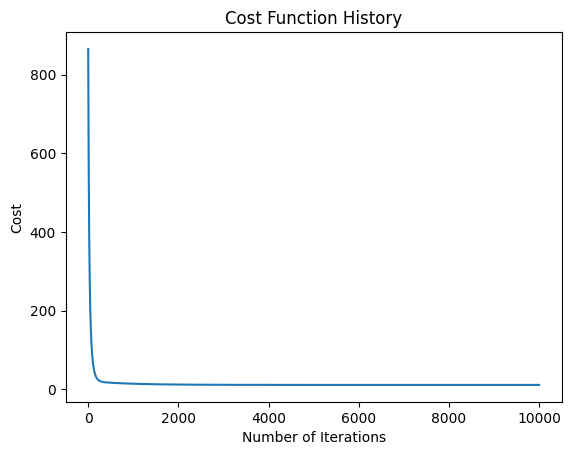

In [35]:
# Plot the training cost over iterations for the final model
plt.plot(range(len(cost_history_final)), cost_history_final)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [36]:
# Print the final parameters
print(f'Final theta: {theta_final}')

Final theta: [27.40790497 -0.32156536  5.39000926  0.55859314 26.51499508  2.42327847
  1.96692137 -0.03200853  0.02948203  0.11683915  0.71977215]


In [37]:
print("I am satisfied that I found the best answer, since the both trainning and test R2 are close to 1 and test R2 is higher than trainning R2 and training MSE is higher than test MSE")

I am satisfied that I found the best answer, since the both trainning and test R2 are close to 1 and test R2 is higher than trainning R2 and training MSE is higher than test MSE
